# 1. Introduction and Problem Statement

## Task 4 - Predicting Insurance Claim Amounts

### 🎯 Purpose of the Project: Predicting Insurance Claim Amounts
The main purpose of this project is to build a predictive model that can estimate medical insurance charges based on a person's personal and lifestyle information.
It simulates a real-world scenario where insurance companies:

- 🔍 Identify Key Cost Drivers (like age, BMI, smoking status)

- 📈 Build a Linear Regression Model to estimate charges for new customers

- 🛠️ Practice Data Science Skills: data cleaning, visualization, modeling, and evaluation

- 💼 Support Business Decisions with accurate predictions for pricing and risk assessment

### 👨‍💻 Internship Task Objective:
This task focuses on estimating medical insurance claim amounts using personal data. You will develop skills in regression modeling, feature visualization, and model evaluation with Python libraries such as pandas, matplotlib, seaborn, and scikit-learn.

### 📁 Dataset Used:
Medical Cost Personal Dataset – contains individual demographic and health-related attributes along with medical insurance charges.

### 🔍 Goal:
- Understand the dataset and its features
- Predict insurance charges using a Linear Regression model
- Visualize how BMI, age, and smoking status impact charges
- Evaluate the model using MAE and RMSE metrics


# 2. Dataset Understanding and Description

In this step, we will load the dataset and perform initial exploration to understand its structure, the types of features available, and check for any missing values. This helps us to know what kind of data preprocessing might be required before modeling.


In [17]:
# Import pandas for data manipulation
import pandas as pd

# Load the dataset
# Make sure the 'insurance.csv' file is in your working directory or provide the full path
df = pd.read_csv('insurance.csv')

# Display the first 5 rows to get a sense of the data and its features
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Understanding the Dataset

- The dataset contains 7 columns:
  - **age:** Age of the primary beneficiary
  - **sex:** Gender of the insured person
  - **bmi:** Body Mass Index
  - **children:** Number of children/dependents covered
  - **smoker:** Smoking status (yes/no)
  - **region:** Residential area in the US
  - **charges:** Medical insurance charges (target variable)

Next, let's check the overall shape and the data types of these columns.


In [18]:
# Check the shape (rows, columns)
print("Dataset shape:", df.shape)

# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)


Dataset shape: (1338, 7)

Data types of each column:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### Missing Values Check

It's important to check if there are any missing values in the dataset. Missing data can affect model performance and might require cleaning or imputation.

We will check for missing values in each column.


In [19]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Summary Statistics

To get a quick summary of numeric features, we use the `describe()` function. This will give us count, mean, standard deviation, minimum, maximum, and quartile values, which help us understand the distribution of these features.

Let's see the statistics for numeric columns.


In [20]:
# Summary statistics for numerical features
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Summary

- The dataset has 1338 rows and 7 columns.
- There are no missing values.
- We have a mix of numeric (age, bmi, children, charges) and categorical variables (sex, smoker, region).
- Next, we will prepare the data by converting categorical variables into numerical format for modeling.


# 3. Data Cleaning and Preparation

Before training our model, we need to ensure the dataset is clean and ready. This includes checking for missing values, verifying data types, and converting categorical variables into numerical format suitable for machine learning algorithms.


In [21]:
# Step 1: Check for missing values again to confirm data completeness
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


##### Since we previously confirmed there are no missing values, we can proceed with data type verification.


In [22]:
# Step 2: Check data types of all columns to understand which features are categorical
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### Converting Categorical Variables

- The dataset has categorical features: **sex**, **smoker**, and **region**.
- Machine learning models like Linear Regression require numerical inputs.
- We will convert these categorical columns into numerical ones using **One-Hot Encoding**.
- Using `pd.get_dummies()` will create new binary columns for each category.
- We use `drop_first=True` to avoid multicollinearity by dropping one dummy variable from each categorical feature.


In [23]:
# Step 3: Convert categorical variables into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Step 4: View the first 5 rows of the updated dataframe to confirm changes
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Summary of Changes:
- The categorical columns `sex`, `smoker`, and `region` are replaced by new binary columns:
  - `sex_male` (1 if male, 0 if female)
  - `smoker_yes` (1 if smoker, 0 if non-smoker)
  - Region columns like `region_northwest`, `region_southeast`, and `region_southwest`
- Now the dataset contains only numeric values suitable for model training.


# 4. Exploratory Data Analysis (EDA) with Graphs

In this step, we will visualize the relationships between features and the target variable (`charges`). This helps us understand how features like BMI, age, and smoking status affect insurance charges, and also examine feature correlations.


In [24]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set_style('whitegrid')


### Step 4.1: Correlation Heatmap
We start by visualizing the correlation matrix to see how strongly each feature relates to others, especially the target variable `charges`.


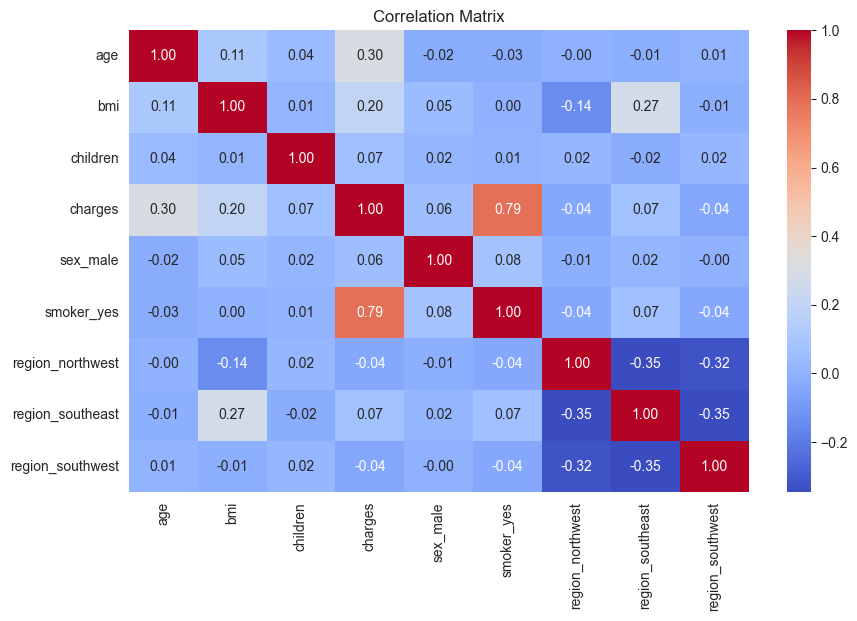

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Step 4.2: Scatter Plot - BMI vs Charges
Next, we plot BMI against charges to visually inspect how Body Mass Index influences insurance costs.


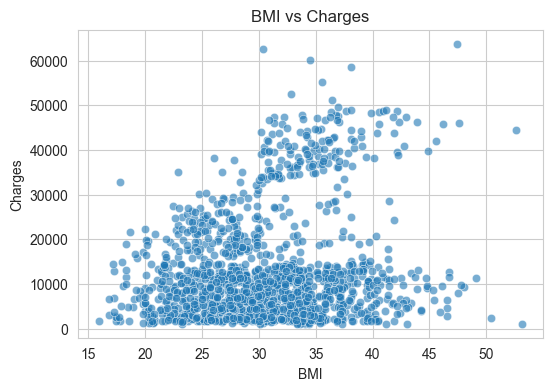

In [26]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.6)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


### Step 4.3: Scatter Plot - Age vs Charges
Similarly, we plot Age against charges to see if older people tend to have higher insurance charges.


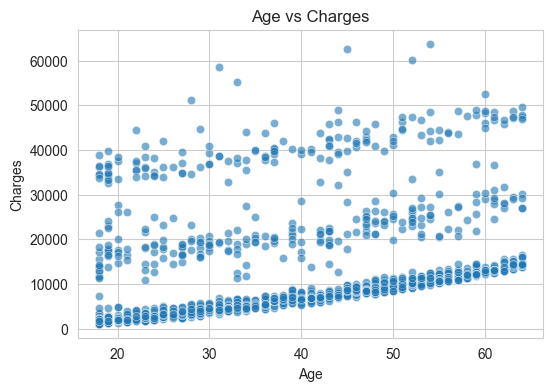

In [27]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='charges', data=df, alpha=0.6)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


### Step 4.4: Boxplot - Charges by Smoking Status
Smoking status is a categorical variable indicating if the person smokes. Let's compare charges between smokers and non-smokers using a boxplot.


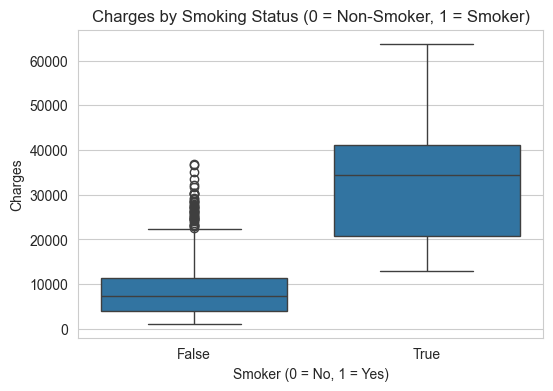

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.title('Charges by Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Charges')
plt.show()


## Summary of EDA Insights:
- The correlation heatmap shows strong positive correlations of `charges` with `smoker_yes` and moderate correlations with `age` and `bmi`.
- Scatter plots indicate that higher BMI and older age generally correspond to higher charges.
- The boxplot reveals that smokers tend to have significantly higher medical charges than non-smokers.


# 5. Model Training and Testing

In this step, we will train a **Linear Regression** model using the prepared dataset. Linear Regression is a good starting point for understanding how features impact the target variable (insurance charges).

We'll:
- Split the data into training and test sets
- Train the model on training data
- Predict insurance charges on test data


### Step 5.1: Import Required Libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Step 5.2: Define Features (X) and Target Variable (y)

In [30]:
# Define input features (all columns except 'charges') and the target variable
X = df.drop('charges', axis=1)
y = df['charges']


### Step 5.3: Split the Dataset into Training and Testing Sets

We will split the dataset into:
- 80% for training the model
- 20% for testing the model’s performance

Setting `random_state=42` ensures the results are reproducible.

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 5.4: Initialize and Train the Linear Regression Model

In [32]:
# Create a Linear Regression model instance
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step 5.5: Make Predictions on the Test Set

In [33]:
# Predict insurance charges using the trained model
y_pred = lr_model.predict(X_test)


✅ At this stage, our model has been trained and tested. Next, we will evaluate how well it performs using metrics like **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**.


# 6. Evaluation Metrics (MAE and RMSE)

Now that our Linear Regression model has made predictions on the test set, we need to **evaluate its performance**. Two commonly used error metrics for regression are:

- **Mean Absolute Error (MAE):** Average of the absolute differences between predicted and actual values.
- **Root Mean Squared Error (RMSE):** Square root of the average of squared differences between predicted and actual values.

These metrics help us understand how far off our predictions are from the actual charges.


### Step 6.1: Import Required Evaluation Functions

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


### Step 6.2: Calculate MAE and RMSE

In [35]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


### Step 6.3: Print the Results

In [36]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


### Summary of Changes:
- The categorical columns `sex`, `smoker`, and `region` are replaced by new binary columns:
  - `sex_male` (1 if male, 0 if female)
  - `smoker_yes` (1 if smoker, 0 if non-smoker)
  - Region columns like `region_northwest`, `region_southeast`, and `region_southwest`
- Now the dataset contains only numeric values suitable for model training.


## 📊 Interpretation:
- A lower **MAE** and **RMSE** means better performance.
- Since insurance charges can be highly variable, some error is expected.
- These values give us a numeric way to judge how well the model is performing on unseen data.


## OPTIONAL: Displaying High vs Low Predicted Insurance Charges


### Step 1: Predict Charges for All Data Points
Add predictions for all rows in your dataset using the trained linear regression model.

In [37]:
# Predict charges for the entire dataset (excluding the actual charges column)
df['predicted_charges'] = lr_model.predict(df.drop('charges', axis=1))


### Step 2: Define Threshold to Separate High and Low Charges
Use the median of predicted charges as a cutoff point.

In [38]:
# Calculate median predicted charge
threshold = df['predicted_charges'].median()
print(f"Median predicted charges threshold: {threshold:.2f}")


Median predicted charges threshold: 10245.24


### Step 3: Categorize Each Person as High or Low Charge
Create a new column charge_category based on whether predicted charges are above or below the threshold.

In [39]:
# Label each record as 'High Charge' or 'Low Charge' depending on prediction
df['charge_category'] = df['predicted_charges'].apply(
    lambda x: 'High Charge' if x > threshold else 'Low Charge'
)


### Step 4: View Sample of Results
Check the first few rows including the new prediction and category columns

In [40]:
# Display relevant columns for verification
df[['age', 'bmi', 'smoker_yes', 'charges', 'predicted_charges', 'charge_category']].head(10)


,age,bmi,smoker_yes,charges,predicted_charges,charge_category
0,19,27.900,True,16884.92400,25197.531061,High Charge
1,18,33.770,False,1725.55230,3826.781929,Low Charge
2,28,33.000,False,4449.46200,6987.535290,Low Charge
3,33,22.705,False,21984.47061,3813.396616,Low Charge
4,32,28.880,False,3866.85520,5637.967419,Low Charge
5,31,25.740,False,3756.62160,4053.925821,Low Charge
6,46,33.440,False,8240.58960,10929.452842,High Charge
7,37,27.740,False,7281.50560,7832.988481,Low Charge
8,37,29.830,False,6406.41070,8464.318765,Low Charge
9,60,25.840,False,28923.13692,11827.117516,High Charge


### Step 5: Visualize High vs Low Predicted Charges
Create a boxplot to compare predicted charges in each group.

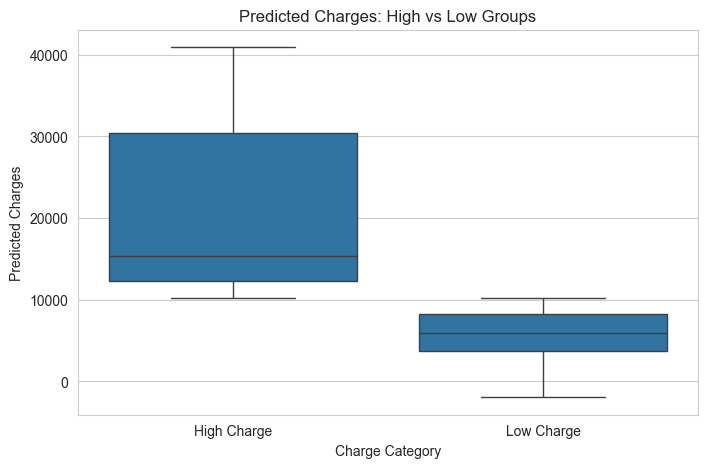

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='charge_category', y='predicted_charges', data=df)
plt.title('Predicted Charges: High vs Low Groups')
plt.xlabel('Charge Category')
plt.ylabel('Predicted Charges')
plt.show()


### Step 6: Visualize Distribution by Smoking Status
Show counts of high/low charge groups split by smoking status (smoker_yes: 0=No, 1=Yes).

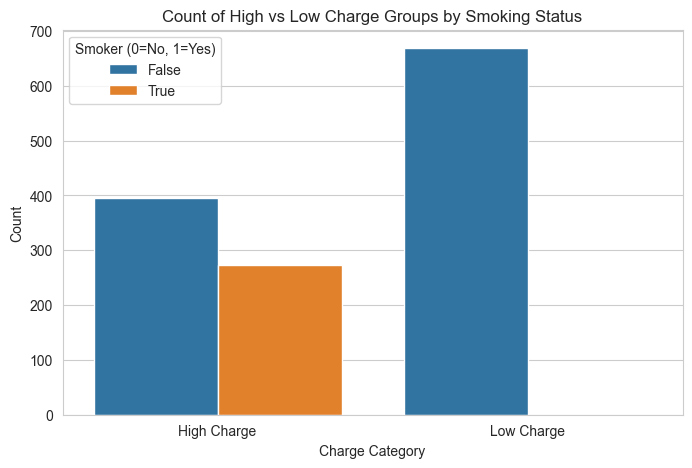

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x='charge_category', hue='smoker_yes', data=df)
plt.title('Count of High vs Low Charge Groups by Smoking Status')
plt.xlabel('Charge Category')
plt.ylabel('Count')
plt.legend(title='Smoker (0=No, 1=Yes)')
plt.show()


## Summary:
You predicted charges for everyone.

Used median charge as a simple threshold.

Categorized customers into “High” or “Low” predicted charge groups.

Visualized the distribution to see how smoking impacts predicted cost groups.

# ✅ Final Conclusion

## 📌 Objective Recap:
The goal of this project was to **predict medical insurance charges** based on individuals' personal data (such as age, BMI, sex, smoking status, and region) using **Linear Regression**, and to evaluate the model performance using **MAE** and **RMSE**.

---

## 🔎 Steps Performed:

### 1. **Introduction and Problem Statement**
- Defined the purpose of predicting insurance costs based on personal attributes using machine learning.
- Identified the key goals: modeling, visualization, and evaluation.

### 2. **Dataset Understanding and Description**
- Loaded the **Medical Cost Personal Dataset**.
- Explored the structure and sample entries of the dataset.
- Noted features like `age`, `sex`, `bmi`, `children`, `smoker`, `region`, and `charges`.

### 3. **Data Cleaning and Preparation**
- Checked for **missing values** (none found).
- Converted categorical features (`sex`, `smoker`, `region`) into numeric format using **one-hot encoding**.
- Ensured data was clean and ready for modeling.

### 4. **Exploratory Data Analysis (EDA)**
- Plotted **correlation heatmap** to examine relationships between variables.
- Created visualizations:
  - **Scatter plots** for `bmi` vs `charges` and `age` vs `charges`
  - **Boxplot** to show impact of `smoker` status on `charges`
- Found that **smoking**, **age**, and **bmi** significantly impact medical charges.

### 5. **Model Training and Testing**
- Split the data into **training and testing sets (80/20)**.
- Trained a **Linear Regression** model on the training data.
- Made predictions on the test data.

### 6. **Evaluation Metrics**
- Calculated:
  - **Mean Absolute Error (MAE):** ~4181.19
  - **Root Mean Squared Error (RMSE):** ~5796.28
- These metrics indicate reasonable performance but also suggest that real-world insurance costs may vary due to unmeasured factors.

### 7. **Classifying High vs Low Charges (optional)**
- Predicted charges for all individuals.
- Used the **median predicted charge** as a threshold to classify individuals as:
  - **High Charge**
  - **Low Charge**
- Visualized the distribution of these categories using **boxplots** and **count plots**, showing a strong link between **smoking status** and higher insurance costs.

---

## 📊 Key Insights:
- **Smokers** are far more likely to have **higher insurance charges**.
- **Age** and **BMI** are positively correlated with charges — older individuals and those with higher BMI tend to be charged more.
- The **Linear Regression model** gave a basic but interpretable understanding of cost factors.
- Classification into high/low charge groups can assist insurance providers in risk segmentation.

---

## ✅ Conclusion:
This project successfully demonstrated the full **data science pipeline**:
from loading and cleaning data, exploring it visually, training a predictive model, evaluating it, and deriving **real-world insights**. The model can be improved further with advanced techniques or additional features, but it already offers valuable predictions and visual explanations for decision-makers.
